In [2]:
!pip install pennylane

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools
     

# Constants
IMG_SIZE = 48
DATA_DIR = '/kaggle/input/facial-emotion-recognition/images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Load the dataset
csv_path = '/kaggle/input/facial-emotion-recognition/emotions.csv'
emotions_df = pd.read_csv(csv_path)
     

emotions_df['set_id'].unique()
     

# Encode the gender column
label_encoder = LabelEncoder()
emotions_df['gender'] = label_encoder.fit_transform(emotions_df['gender'])
     

emotions_df
# Function to load and preprocess images
def load_data():
    images = []
    labels = []

    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()
     

# Define the number of samples for training and testing
n_train = 5000
n_test = 3000

# Load the data
images, labels = load_data()

# Normalize pixel values to be within 0 and 1
images = images / 255.0

# Reduce dataset size
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[-n_test:]
test_labels = labels[-n_test:]

# Add an extra dimension for convolutional input (e.g., grayscale channels)
train_images = np.expand_dims(train_images, axis=-1)  # Shape: (n_train, 48, 48, 1)
test_images = np.expand_dims(test_images, axis=-1)    # Shape: (n_test, 48, 48, 1)

# Convert labels to categorical
train_labels_categorical = to_categorical(train_labels, num_classes=len(EMOTIONS))
test_labels_categorical = to_categorical(test_labels, num_classes=len(EMOTIONS))

# Check the shapes of the processed data
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Train labels shape: {train_labels_categorical.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
     

n_layers = 5    # Number of random layers


SAVE_PATH = ""  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

2025-10-22 16:09:03.207655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761149343.235620    1293 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761149343.243852    1293 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Train images shape: (64, 48, 48, 1)
Test images shape: (64, 48, 48, 1)
Train labels shape: (64, 8)
Test labels shape: (64, 8)



Running for 12 qubits...

Quantum circuit diagram:
Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-22 16:46:15.816003: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 - 2s - 877ms/step - accuracy: 0.1875 - loss: 2.1407 - val_accuracy: 0.4531 - val_loss: 1.2457
Epoch 2/7
2/2 - 0s - 50ms/step - accuracy: 0.4688 - loss: 1.3742 - val_accuracy: 0.8594 - val_loss: 0.8629
Epoch 3/7
2/2 - 0s - 49ms/step - accuracy: 0.6250 - loss: 0.9646 - val_accuracy: 0.9219 - val_loss: 0.5670
Epoch 4/7
2/2 - 0s - 50ms/step - accuracy: 0.7969 - loss: 0.6922 - val_accuracy: 0.8906 - val_loss: 0.3980
Epoch 5/7
2/2 - 0s - 49ms/step - accuracy: 0.8906 - loss: 0.4934 - val_accuracy: 0.9531 - val_loss: 0.2812
Epoch 6/7
2/2 - 0s - 51ms/step - accuracy: 0.8906 - loss: 0.4491 - val_accuracy: 0.9844 - val_loss: 0.1724
Epoch 7/7
2/2 - 0s - 49ms/step - accuracy: 0.9531 - loss: 0.2899 - val_accuracy: 0.9844 - val_loss: 0.0896
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         8
    Contempt       1.00      1.00      1.00         8
     Disgust       1.00      0.88  

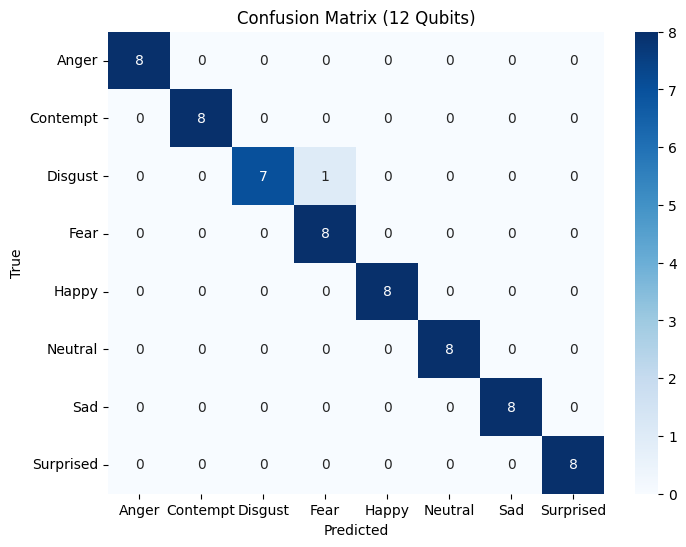

Test Accuracy: 0.9844


=== Summary of Results ===
12 Qubits: Accuracy = 0.9844


In [4]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define qubit patch sizes
qubit_patch_shapes = {
    #4: (2, 2),
    #6: (3, 2),
    #8: (4, 2),
    #10: (5, 2),
    12: (4, 3),
}

n_epochs = 7

# Function to create circuit
def create_circuit(n_qubits, n_layers=3):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding pixels
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit, dev, rand_params

# Quantum convolution
def quanv(image, circuit, patch_h, patch_w):
    out_h = (image.shape[0] - patch_h) // 2 + 1
    out_w = (image.shape[1] - patch_w) // 2 + 1
    n_qubits = patch_h * patch_w
    out = np.zeros((out_h, out_w, n_qubits))

    for j in range(0, image.shape[0] - patch_h + 1, 2):
        for k in range(0, image.shape[1] - patch_w + 1, 2):
            patch_pixels = image[j:j+patch_h, k:k+patch_w, 0].flatten()
            q_results = circuit(patch_pixels)
            for c in range(n_qubits):
                out[j // 2, k // 2, c] = q_results[c]
    return out

# Training & Evaluation
def run_for_qubits(n_qubits):
    print(f"\nRunning for {n_qubits} qubits...")
    patch_h, patch_w = qubit_patch_shapes[n_qubits]
    circuit, dev, rand_params = create_circuit(n_qubits)

    # Show quantum circuit
    print("\nQuantum circuit diagram:")
    qml.draw(circuit)(np.random.rand(n_qubits))

    # Preprocess images
    q_train = np.array([quanv(img, circuit, patch_h, patch_w) for img in train_images])
    q_test = np.array([quanv(img, circuit, patch_h, patch_w) for img in test_images])

    # Build model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=q_train.shape[1:]),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(len(EMOTIONS), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(q_train, train_labels, validation_data=(q_test, test_labels),
              epochs=n_epochs, batch_size=32, verbose=2)

    # Predictions
    y_pred = np.argmax(model.predict(q_test), axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(test_labels, y_pred, target_names=EMOTIONS))

    # Confusion matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=EMOTIONS, yticklabels=EMOTIONS)
    plt.title(f"Confusion Matrix ({n_qubits} Qubits)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Test accuracy
    acc = model.evaluate(q_test, test_labels, verbose=0)[1]
    print(f"Test Accuracy: {acc:.4f}\n")

    return acc

# Run for 4,6,8,10,12 qubits
results = {}
for q in [12]:
    acc = run_for_qubits(q)
    results[q] = acc

print("\n=== Summary of Results ===")
for q, a in results.items():
    print(f"{q} Qubits: Accuracy = {a:.4f}")


In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers

# Define qubit counts
qubit_counts = [12]

def create_circuit(n_qubits, n_layers=1):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        # Random layers
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit

# Loop through all qubit counts and print their circuits
for n_qubits in qubit_counts:
    print(f"\n=== Quantum Circuit for {n_qubits} Qubits ===")
    circuit = create_circuit(n_qubits)
    print(qml.draw(circuit)(np.random.rand(n_qubits)))  # <-- This prints the circuit



=== Quantum Circuit for 12 Qubits ===
 0: ──RY(2.12)─╭RandomLayers(M0)─┤  <Z>
 1: ──RY(1.00)─├RandomLayers(M0)─┤  <Z>
 2: ──RY(2.45)─├RandomLayers(M0)─┤  <Z>
 3: ──RY(2.98)─├RandomLayers(M0)─┤  <Z>
 4: ──RY(2.08)─├RandomLayers(M0)─┤  <Z>
 5: ──RY(0.04)─├RandomLayers(M0)─┤  <Z>
 6: ──RY(1.96)─├RandomLayers(M0)─┤  <Z>
 7: ──RY(2.12)─├RandomLayers(M0)─┤  <Z>
 8: ──RY(3.05)─├RandomLayers(M0)─┤  <Z>
 9: ──RY(2.76)─├RandomLayers(M0)─┤  <Z>
10: ──RY(1.60)─├RandomLayers(M0)─┤  <Z>
11: ──RY(0.18)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[2.04233197 0.24143408 3.98526144 6.02525595 4.10160253 3.99019258
  6.25365162 3.65587344 2.60355463 2.98261237 3.91762951 2.12376448]]



=== Quantum Circuit for 12 Qubits ===


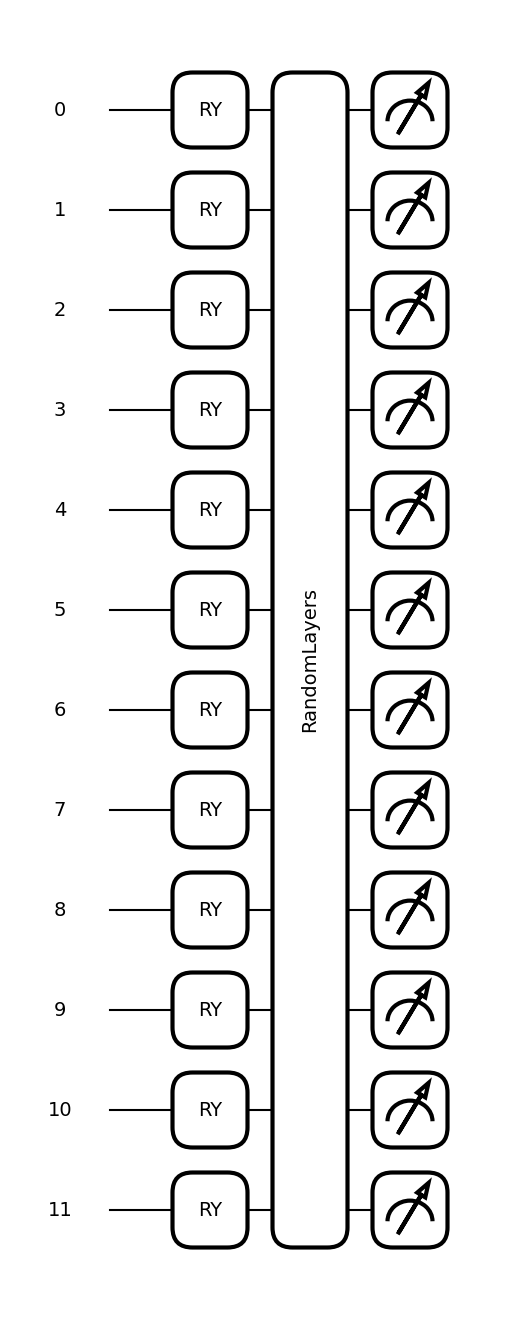

In [6]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import matplotlib.pyplot as plt

# Qubit counts
qubit_counts = [12]

def create_circuit(n_qubits, n_layers=1):
    dev = qml.device("default.qubit", wires=n_qubits)
    rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, n_qubits))

    @qml.qnode(dev)
    def circuit(phi):
        # Encoding
        for j in range(n_qubits):
            qml.RY(np.pi * phi[j], wires=j)
        # Random layers
        RandomLayers(rand_params, wires=range(n_qubits))
        return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

    return circuit

# Display circuits graphically
for n_qubits in qubit_counts:
    print(f"\n=== Quantum Circuit for {n_qubits} Qubits ===")
    circuit = create_circuit(n_qubits)
    fig, ax = qml.draw_mpl(circuit)(np.random.rand(n_qubits))
    plt.show()